# Aplicando o método CRISP-DM em caráter de estudo
**Briefing do Gestor:**<br>
Nosso time de Customer Success identificou que a taxa de cancelamento (churn) dos nossos clientes está aumentando, especialmente entre pequenas e médias empresas que assinaram nossos pacotes nos últimos 12 meses. Isso está afetando nossa receita recorrente mensal (MRR) e queremos agir preventivamente.

**Missão:**<br>
Construir um modelo de machine learning que nos ajude a prever quais clientes têm maior probabilidade de churn nos próximos 30 dias, para que possamos aplicar ações proativas e reduzir perdas.

## Etapa 1: Business Understanding
**Problema:** Aumento no churn entre pequenas e médias empresas que assinaram o pacote nos últimos 12 meses.<br>
**Objetivo:** Antecipar o risco de cancelamento para permitir ações de retenção.<br>
**Stakeholders:** Gestor e Time de CS.<br>
**Pergunta:** Quais clientes têm maior probabilidade de cancelar o contrato nos próximos 30 dias?

## Etapa 2: Data Understanding
**Objetivo:** Explorar o dataset para entender suas características, verificar se os dados estão adequados à pergunta de negócio e identificar possíveis problemas.

In [146]:
import pandas as pd

# Carregar o dataset telco.csv baixado no Kagle
url = "https://raw.githubusercontent.com/simeia/data-projects/main/crisp-dm/telco.csv"
df = pd.read_csv(url)

# Visualizar as primeiras linhas
df.head(10)

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges
5,4412-YLTKF,Female,72,No,Yes,No,Yes,1,United States,California,...,10,89.91,2235.41,1,Churned,Yes,95,4638,Competitor,Competitor had better devices
6,0390-DCFDQ,Female,76,No,Yes,Yes,Yes,2,United States,California,...,0,15.28,85.73,2,Churned,Yes,76,3964,Other,Don't know
7,3445-HXXGF,Male,66,No,Yes,Yes,No,0,United States,California,...,0,0.00,2610.25,1,Churned,Yes,91,5444,Dissatisfaction,Service dissatisfaction
8,2656-FMOKZ,Female,70,No,Yes,No,Yes,2,United States,California,...,0,661.05,1806.75,2,Churned,Yes,91,5717,Dissatisfaction,Limited range of services
9,2070-FNEXE,Female,77,No,Yes,No,Yes,2,United States,California,...,0,188.65,681.20,2,Churned,Yes,81,4419,Price,Lack of affordable download/upload speed


### 2.1. Vamos observar a estrutura geral dos dados
Por que fazer isso?
- Saber se as variáveis são do tipo correto
- Identificar colunas com dados ausentes, o que pode afetar a modelagem

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

### 2.2 Verificar estatísticas resumidas (para colunas numéricas)
Por que fazer isso?
- Ver se tem valores esquisitos ou fora do esperado
- Avaliar distribuição dos dados (a maioria está perto da média ou espalhado?)

In [148]:
df.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Score,CLTV
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056,3.244924,58.505040,4400.295755
std,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542,1.201657,21.170031,1183.057152
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000,1.000000,5.000000,2003.000000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000,3.000000,40.000000,3469.000000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000,3.000000,61.000000,4527.000000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,4.000000,75.500000,5380.500000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,5.000000,96.000000,6500.000000


### 2.3 Verificar valores únicos por coluna
Por que fazer isso?
- Para identificar colunas categóricas (ex: “Yes”/“No”)
- Ver se há colunas com 1 único valor, que não servem pra nada e podem ser removidas

In [149]:
df.nunique()

Customer ID                          7043
Gender                                  2
Age                                    62
Under 30                                2
Senior Citizen                          2
Married                                 2
Dependents                              2
Number of Dependents                   10
Country                                 1
State                                   1
City                                 1106
Zip Code                             1626
Latitude                             1626
Longitude                            1625
Population                           1569
Quarter                                 1
Referred a Friend                       2
Number of Referrals                    12
Tenure in Months                       72
Offer                                   5
Phone Service                           2
Avg Monthly Long Distance Charges    3584
Multiple Lines                          2
Internet Service                  

### 2.4 Analisar se há dados ausentes
Por que fazer isso?
- Para decidir se devemos preencher, remover ou ignorar essas colunas

In [150]:
df.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Under 30                                0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Dependents                    0
Country                                 0
State                                   0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Population                              0
Quarter                                 0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                  

### 2.5 Gráfico simples para observação de padrões
Por que fazer isso?
- Pra ver se os dados estão balanceados
- Visualmente é mais fácil enxergar padrões

<Axes: xlabel='Churn Label'>

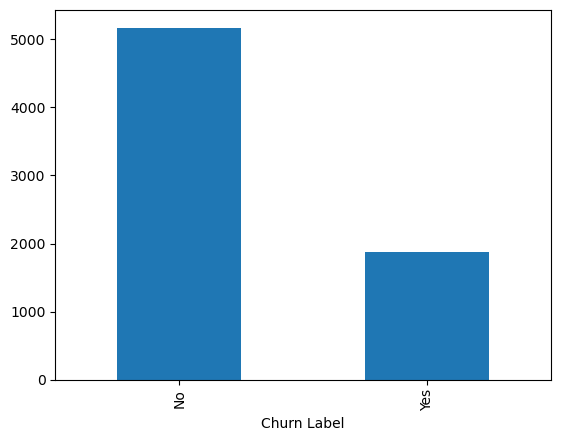

In [151]:
df['Churn Label'].value_counts().plot(kind='bar')

### 2.6 Verificar correlação com variável alvo
Pra ver se há alguma relação visível entre variáveis e o churn (se sim, isso pode virar feature).<br>
A ideia agora é se perguntar: “Será que essa variável ajuda a explicar quem cancela e quem não cancela?”

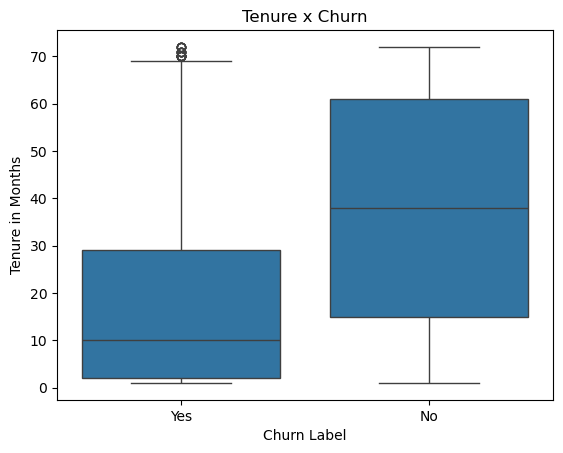

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Churn Label', y='Tenure in Months', data=df)
plt.title("Tenure x Churn")
plt.show()

Esse boxplot mostra claramente que:
- A mediana de tenure para quem cancela (Yes) é baixa → muitos cancelam nos primeiros meses.
- Já os que não cancelam (No) têm tempo médio bem mais alto, e distribuição mais larga.

Isso indica que o tempo de permanência é uma variável importante para prever cancelamento e deve ser usada no modelo.

## 2.7 Verificar a relação entre tipo de contrato e churn

Agora vamos a outro teste: **Será que o tipo de contrato do cliente influencia no churn?**<br>
**Hipótese:** Clientes com contrato mensal (“Month-to-month”) têm maior taxa de churn do que aqueles com contratos anuais ou bienais.

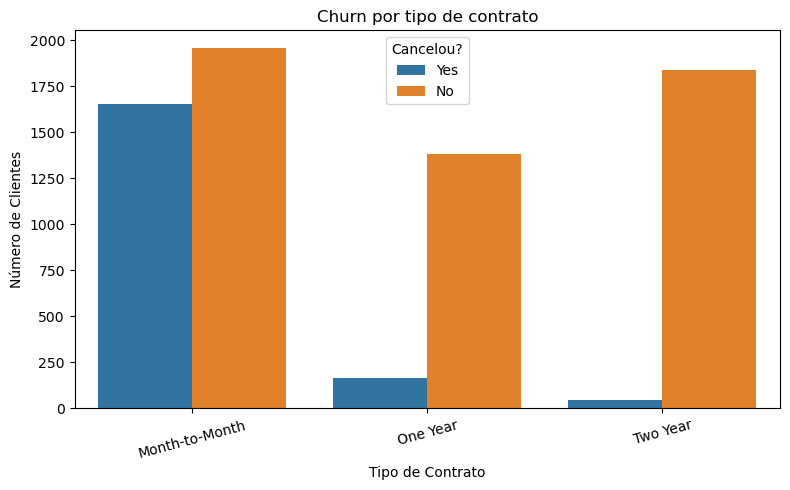

In [153]:
plt.figure(figsize=(8,5))
sns.countplot(x='Contract', hue='Churn Label', data=df)
plt.title("Churn por tipo de contrato")
plt.xlabel("Tipo de Contrato")
plt.ylabel("Número de Clientes")
plt.legend(title="Cancelou?")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

**Insights de Correlação:**
- Clientes com contrato mensal são significativamente mais propensos a cancelar.
- Contratos de 1 ou 2 anos parecem contribuir para retenção.
- Hipótese validada visualmente. Variável será mantida para modelagem.

## Etapa 3: Data Preparation
### 3.1 Remover colunas irrelevantes e redundantes

Com base na análise, essas colunas parecem inúteis para prever churn:
- Customer ID – identificador único, não carrega informação.
- Zip Code, Latitude, Longitude, City, State, Country – localização granular demais (e quase todas com valor único).
- Streaming TV, Streaming Movies, Streaming Music – uso muito específico, pode ser redundante com Internet Service.
- Total Extra Data Charges, Total Long Distance Charges, Avg Monthly Long Distance Charges – extremamente técnicas e pouco interpretáveis nesse momento.
- Churn Category, Churn Reason – explicam o churn, mas só estão disponíveis após o cancelamento (não podem ser usadas como preditoras!).
- 	Under 30 e Senior Citizen podem ser derivados de Age. Vale a pena manter apenas Age, pois os outros dois são derivados simples.
- Monthly Charge, Total Charges, Total Revenue – qual representa melhor o comportamento financeiro? Vamos escolher 1 ou 2.
- Internet Type, Internet Service, Phone Service – estão correlacionadas. Talvez mantenhamos apenas Internet Service e Phone Service.

In [154]:
# Remover colunas irrelevantes e redundantes para previsão de churn
cols_to_drop = [
    'Customer ID', 'Zip Code', 'Latitude', 'Longitude', 'City', 'State', 'Country','Churn Category', 'Churn Reason', 'Churn Score','Under 30', 'Senior Citizen','Streaming TV', 'Streaming Movies', 'Streaming Music', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Avg Monthly Long Distance Charges','Quarter','Customer Status', 'Population']
df.drop(columns=cols_to_drop, inplace=True)

### 3.2 Tratar valores nulos
- Offer (3877 nulos) – pode indicar não recebeu oferta, talvez fazer preenchimento com “None”.
- Internet Type (1526 nulos) – ausente possivelmente porque não contratou internet. Podemos preencher com "None".
- Churn Category, Churn Reason – têm muitos nulos porque só aparecem quando houve cancelamento. Essas devem ser removidas, como discutido.

In [155]:
# Preencher valores nulos da coluna 'Offer' com 'None' (sem oferta)
df['Offer'] = df['Offer'].fillna('None')

# Preencher nulos em 'Internet Type' com 'None' (usuários sem internet)
df['Internet Type'] = df['Internet Type'].fillna('None')

# Confirmar se ainda há valores nulos no DataFrame
print("Valores nulos restantes por coluna:")
print(df.isnull().sum())

Valores nulos restantes por coluna:
Gender                     0
Age                        0
Married                    0
Dependents                 0
Number of Dependents       0
Referred a Friend          0
Number of Referrals        0
Tenure in Months           0
Offer                      0
Phone Service              0
Multiple Lines             0
Internet Service           0
Internet Type              0
Avg Monthly GB Download    0
Online Security            0
Online Backup              0
Device Protection Plan     0
Premium Tech Support       0
Unlimited Data             0
Contract                   0
Paperless Billing          0
Payment Method             0
Monthly Charge             0
Total Charges              0
Total Refunds              0
Total Revenue              0
Satisfaction Score         0
Churn Label                0
CLTV                       0
dtype: int64


### 3.3 Balanceamento das classes
Por que balancear?
O problema de Churn costuma apresentar dados desbalanceados, ou seja:
- Muitos clientes não cancelam (classe majoritária)
- Poucos clientes cancelam (classe minoritária)

E isso acontece com nossos dados como foi observado no item 2.5 deste notebook.<br>
Se treinarmos um modelo assim, ele pode “aprender” a só prever a classe majoritária, porque isso já daria alta acurácia. Por isso, equilibrar as classes ajuda o modelo a aprender padrões reais da classe minoritária também.<br>
Queremos que o modelo tenha a mesma chance de aprender padrões de clientes que cancelam (1) e os que não cancelam (0).

**O que fazer se estiver desbalanceado?<br>**
Podemos aplicar o oversampling da classe minoritária (mais comum).

Antes de balancear, vamos confirmar o desequilíbrio:

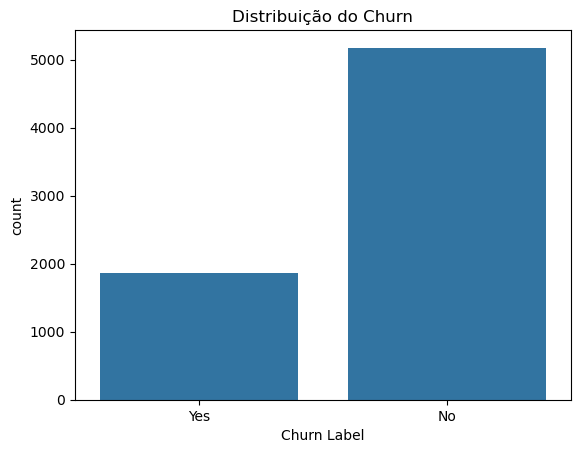

In [156]:
sns.countplot(x='Churn Label', data=df)
plt.title('Distribuição do Churn')
plt.show()

Agora vamos separar os dados para aplicar o balanceamento:

In [157]:
X = df.drop('Churn Label', axis=1)
y = df['Churn Label']

Se ainda houver colunas com texto (tipo “Yes”/“No”, “Male”/“Female”, etc), precisamos transformar em números. 

In [158]:
X = pd.get_dummies(X, drop_first=True)

#### 3.3.1 Balancear com RandomOverSampler

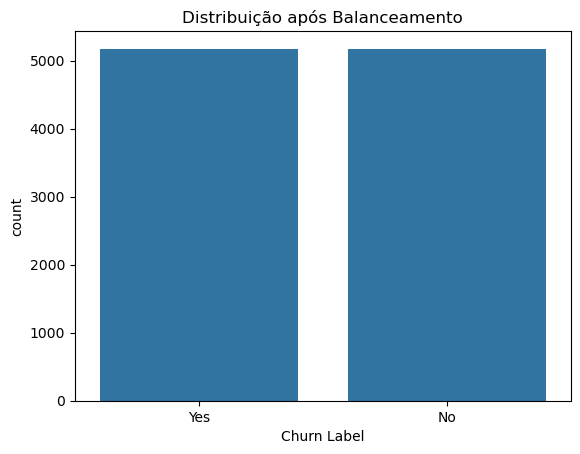

In [159]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_bal, y_bal = ros.fit_resample(X, y)

# Visualizando nova distribuição
sns.countplot(x=y_bal)
plt.title('Distribuição após Balanceamento')
plt.show()

Antes de modelar, precisamos converter as variáveis categóricas em numéricas usando one-hot encoding com `pd.get_dummies()`.<br>
Isso é necessário porque os algoritmos de machine learning do Scikit-Learn exigem que todos os dados de entrada sejam numéricos.

In [160]:
# Convertendo variáveis categóricas em variáveis numéricas usando one-hot encoding
df = pd.get_dummies(df, drop_first=True)

## Etapa 4: Modeling
Nesta etapa vamos usar o RandomForest.<br>
Por que usar o Random Forest aqui é uma ótima decisão?
- Nosso problema é classificação binária com possível desbalanceamento (churn sim/não).
- Precisamos de modelo robusto, com bom desempenho geral e menos sensível a ruído.


Matriz de Confusão:
 [[1023   12]
 [  49  325]]

Relatório de Classificação:
               precision    recall  f1-score   support

       False       0.95      0.99      0.97      1035
        True       0.96      0.87      0.91       374

    accuracy                           0.96      1409
   macro avg       0.96      0.93      0.94      1409
weighted avg       0.96      0.96      0.96      1409



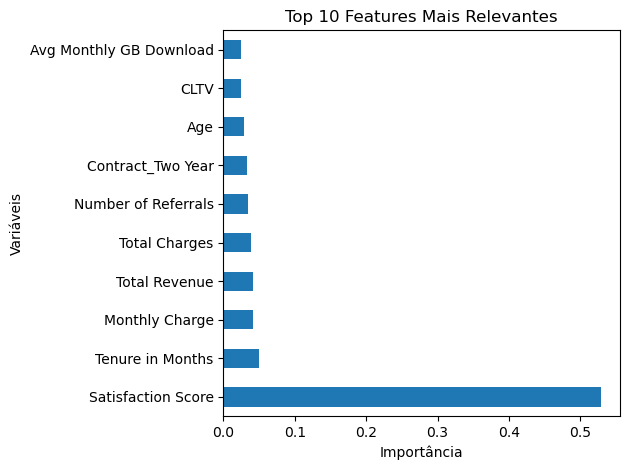

In [161]:
# Importando as bibliotecas necessárias para modelagem e avaliação
from sklearn.ensemble import RandomForestClassifier          # Algoritmo Random Forest
from sklearn.model_selection import train_test_split         # Função para dividir os dados em treino e teste
from sklearn.metrics import classification_report, confusion_matrix  # Métricas de avaliação do modelo

# Separando a variável alvo (churn) do restante dos dados
y = df['Churn Label_Yes']
X = df.drop('Churn Label_Yes', axis=1)

# Dividindo os dados em conjuntos de treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,               # 20% dos dados vão para o teste
    random_state=42,             # Define uma semente para garantir reprodutibilidade
    stratify=y                   # Garante que a proporção de classes seja mantida no split
)

# Instanciando o modelo Random Forest com 100 árvores de decisão
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinando o modelo com os dados de treino
rf_model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = rf_model.predict(X_test)

# Exibindo a matriz de confusão
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))

# Exibindo o relatório de classificação: precisão, recall, f1-score
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

# Calculando a importância das features no modelo Random Forest
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

# Exibindo as 10 variáveis mais importantes para a predição de churn
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Features Mais Relevantes')
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.tight_layout()
plt.show()

## Avaliação do Modelo de Previsão de Churn

Após o treinamento com o algoritmo **Random Forest**, avaliamos o desempenho do modelo com base em um conjunto de teste balanceado.

### Métricas de Desempenho

| Métrica           | Valor |
|-------------------|-------|
| Acurácia          | 96%   |
| Precisão (classe Churn) | 96%   |
| Recall (classe Churn)   | 87%   |
| F1-score (classe Churn) | 91%   |

> O modelo apresentou **alta precisão geral (96%)** e um bom **f1-score (91%)** para a classe minoritária (clientes que cancelaram), o que é essencial para este tipo de problema.

---

### Matriz de Confusão

- **True Negatives (TN):** 1023 — clientes que não cancelaram corretamente identificados.
- **False Positives (FP):** 12 — modelo previu churn para quem não cancelaria.
- **False Negatives (FN):** 49 — modelo não previu churn, mas o cliente cancelou.
- **True Positives (TP):** 325 — clientes com churn corretamente identificados.

Apesar de algumas falhas na identificação do churn (falsos negativos), o modelo se mostrou **bastante eficaz em capturar padrões reais de cancelamento.**

---

### Principais Variáveis Preditivas

As 10 features mais relevantes no modelo foram:

1. `Satisfaction Score`
2. `Tenure in Months`
3. `Monthly Charge`
4. `Total Revenue`
5. `Total Charges`
6. `Number of Referrals`
7. `Contract_Two Year`
8. `Age`
9. `CLTV`
10. `Avg Monthly GB Download`

> A **satisfação do cliente** se destacou como o fator mais importante, reforçando a ideia de que clientes insatisfeitos tendem a cancelar mais.

---

### Conclusão

O modelo mostrou-se **robusto e confiável**, com excelente desempenho geral.

## Etapa 5: Deployment (Simulado)
Nesta etapa, o modelo treinado é preparado para uso prático. Para simular o deployment, criamos uma função que pode receber dados de novos clientes e prever se eles estão propensos ao churn. Essa abordagem é útil para integrar a previsão com sistemas de atendimento, CRM ou dashboards internos.

In [162]:
# Função para prever churn de um novo cliente
def prever_churn(novo_cliente, modelo, encoder, scaler, colunas_modelo):
    """
    Recebe os dados de um novo cliente no formato de dicionário,
    processa conforme o treinamento e retorna a previsão de churn.
    """
    import pandas as pd

    # Criar DataFrame com uma linha
    df_novo = pd.DataFrame([novo_cliente])

    # Garantir que as colunas estejam na mesma ordem e estrutura do treino
    df_novo_encoded = pd.get_dummies(df_novo)
    df_novo_encoded = df_novo_encoded.reindex(columns=colunas_modelo, fill_value=0)

    # Previsão
    predicao = modelo.predict(df_novo_encoded)[0]
    prob = modelo.predict_proba(df_novo_encoded)[0][1]

    return f"❗ Churn previsto: {'Sim' if predicao == 1 else 'Não'} – Probabilidade: {round(prob*100, 2)}%"

Exemplo de uso:

In [165]:
novo_cliente_exemplo = {
    'Gender': 'Female',
    'Age': 45,
    'Married': 'Yes',
    'Dependents': 'No',
    'Number of Dependents': 0,
    'Referred a Friend': 'No',
    'Tenure in Months': 12,
    'Offer': 'None',
    'Phone Service': 'Yes',
    'Multiple Lines': 'No',
    'Internet Service': 'Yes',
    'Internet Type': 'Fiber Optic',
    'Avg Monthly GB Download': 20,
    'Online Security': 'No',
    'Online Backup': 'No',
    'Device Protection Plan': 'No',
    'Premium Tech Support': 'No',
    'Unlimited Data': 'Yes',
    'Contract': 'Month-to-Month',
    'Paperless Billing': 'Yes',
    'Payment Method': 'Bank Withdrawal',
    'Monthly Charge': 80.0,
    'Total Charges': 1000.0,
    'Total Refunds': 0.0,
    'Total Revenue': 1000.0,
    'Satisfaction Score': 2,
    'Churn Score': 60,
    'CLTV': 3000
}

prever_churn(novo_cliente_exemplo, modelo=rf_model, encoder=None, scaler=None, colunas_modelo=X.columns)

'❗ Churn previsto: Sim – Probabilidade: 97.0%'